<a href="https://colab.research.google.com/github/Karthika999-IN/Energy-Consumption-Prediction/blob/main/Power_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset from Google Colab path
file_path = "/content/1Power project_karthika_225_2025.csv"

# Read dataset using the correct delimiter
data = pd.read_csv(file_path, delimiter=",", header=0)

# Display column names to verify correctness
print("Columns in dataset:", data.columns)

# Display first few rows to check data structure
print(data.head())


Columns in dataset: Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
         Date      Time Global_active_power Global_reactive_power Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.84   
1  16/12/2006  17:25:00                5.36                 0.436  233.63   
2  16/12/2006  17:26:00               5.374                 0.498  233.29   
3  16/12/2006  17:27:00               5.388                 0.502  233.74   
4  16/12/2006  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23              0              2            17.0  
3               23              0              1        

In [ ]:
with open(file_path, "r") as file:
    print(file.readline())  # Print first line to inspect delimiter


Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3



In [ ]:
import pandas as pd

# Load dataset from Google Colab path
file_path = "/content/1Power project_karthika_225_2025.csv"

# Read dataset with the correct delimiter
data = pd.read_csv(file_path, delimiter=",", header=0)

# Display column names to verify correctness
print("Columns in dataset:", data.columns)

# Display first few rows to check data structure
print(data.head())


Columns in dataset: Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
         Date      Time Global_active_power Global_reactive_power Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.84   
1  16/12/2006  17:25:00                5.36                 0.436  233.63   
2  16/12/2006  17:26:00               5.374                 0.498  233.29   
3  16/12/2006  17:27:00               5.388                 0.502  233.74   
4  16/12/2006  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23              0              2            17.0  
3               23              0              1        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load dataset from Google Colab path
file_path = "/content/1Power project_karthika_225_2025.csv"

# Read dataset with correct delimiter
data = pd.read_csv(file_path, delimiter=",", header=0)

# Convert Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop original Date and Time columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Handle missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert numeric columns
data.iloc[:, :-1] = data.iloc[:, :-1].astype(float)

# Feature Engineering
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
data['Weekday'] = data['Datetime'].dt.weekday

# Define features and target
X = data[['Hour', 'Day', 'Month', 'Year', 'Weekday', 'Voltage', 'Global_reactive_power', 'Global_intensity']]
y = data['Global_active_power']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}\n")
    return y_pred

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

for model_name, model in models.items():
    train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)

# Insights Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['Datetime'], y=data['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Power Consumption (kW)')
plt.title('Household Power Consumption Over Time')
plt.show()

sns.boxplot(x=data['Hour'], y=data['Global_active_power'])
plt.xlabel('Hour of the Day')
plt.ylabel('Power Consumption (kW)')
plt.title('Power Consumption by Hour')
plt.show()


Model: LinearRegression
MAE: 0.0293


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")  # Fixed here
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}\n")
    return y_pred


Model: LinearRegression
MAE: 0.0293
RMSE: 0.0443
R2 Score: 0.9985

Model: RandomForestRegressor
MAE: 0.0130
RMSE: 0.0312
R2 Score: 0.9992

Model: GradientBoostingRegressor
MAE: 0.0219
RMSE: 0.0380
R2 Score: 0.9989

Model: MLPRegressor
MAE: 0.0201
RMSE: 0.0357
R2 Score: 0.9990



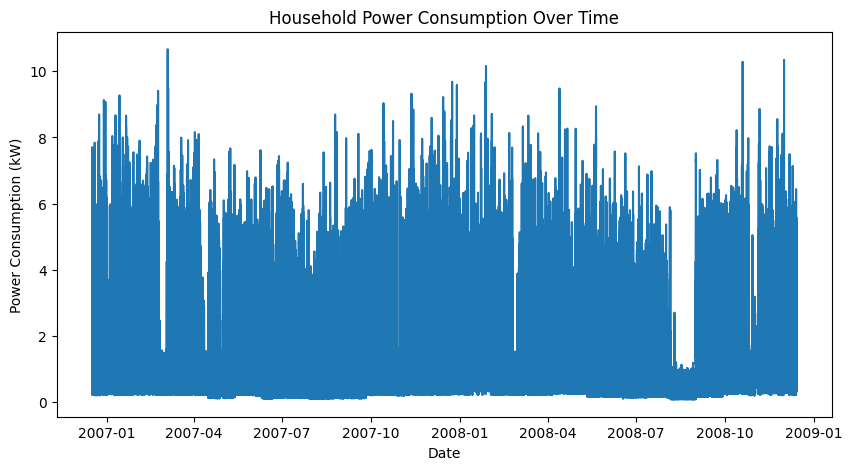

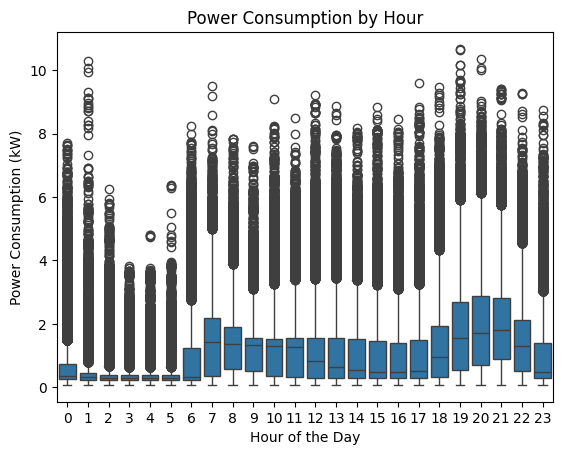

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load dataset from Google Colab path
file_path = "/content/1Power project_karthika_225_2025.csv"

# Read dataset with correct delimiter
data = pd.read_csv(file_path, delimiter=",", header=0)

# Convert Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop original Date and Time columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Handle missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert numeric columns
data.iloc[:, :-1] = data.iloc[:, :-1].astype(float)

# Feature Engineering
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
data['Weekday'] = data['Datetime'].dt.weekday

# Define features and target
X = data[['Hour', 'Day', 'Month', 'Year', 'Weekday', 'Voltage', 'Global_reactive_power', 'Global_intensity']]
y = data['Global_active_power']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}\n")
    return y_pred

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

for model_name, model in models.items():
    train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)

# Insights Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['Datetime'], y=data['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Power Consumption (kW)')
plt.title('Household Power Consumption Over Time')
plt.show()

sns.boxplot(x=data['Hour'], y=data['Global_active_power'])
plt.xlabel('Hour of the Day')
plt.ylabel('Power Consumption (kW)')
plt.title('Power Consumption by Hour')
plt.show()

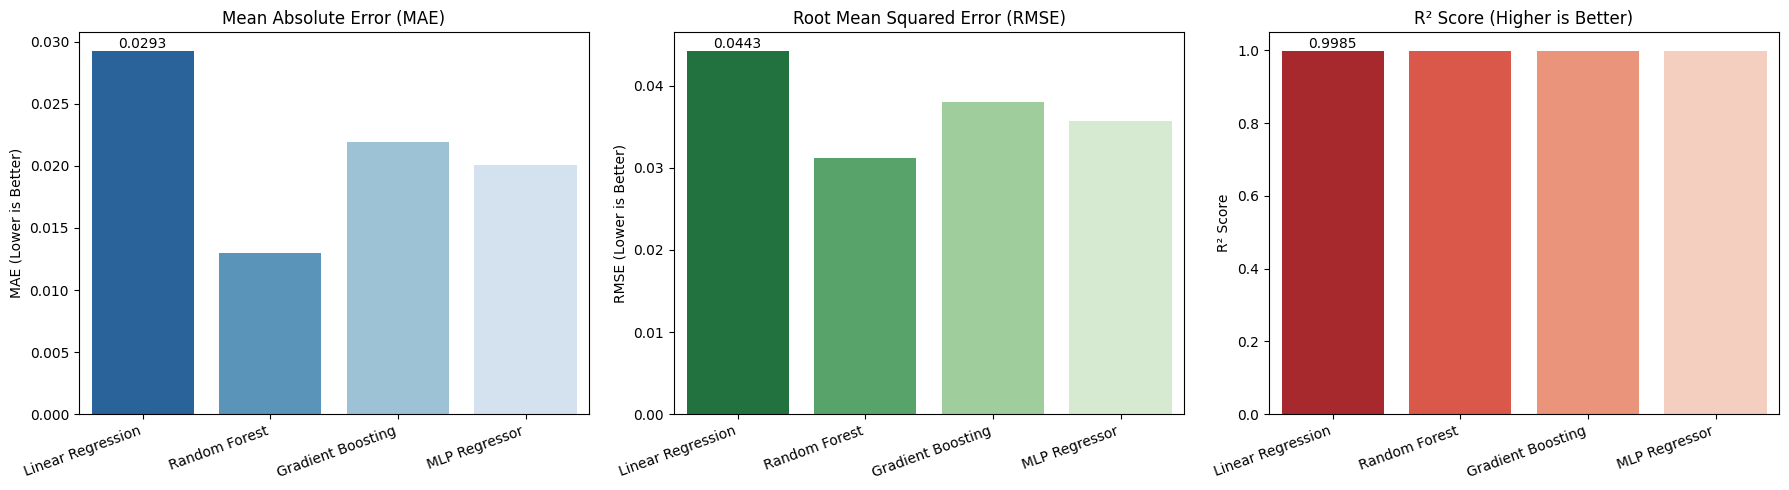

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model names
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "MLP Regressor"]

# Performance metrics
mae_scores = [0.0293, 0.0130, 0.0219, 0.0201]
rmse_scores = [0.0443, 0.0312, 0.0380, 0.0357]
r2_scores = [0.9985, 0.9992, 0.9989, 0.9990]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Plot
sns.barplot(x=models, y=mae_scores, ax=axes[0], palette="Blues_r")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE (Lower is Better)")
axes[0].bar_label(axes[0].containers[0], fmt="%.4f")

# RMSE Plot
sns.barplot(x=models, y=rmse_scores, ax=axes[1], palette="Greens_r")
axes[1].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_ylabel("RMSE (Lower is Better)")
axes[1].bar_label(axes[1].containers[0], fmt="%.4f")

# R² Score Plot
sns.barplot(x=models, y=r2_scores, ax=axes[2], palette="Reds_r")
axes[2].set_title("R² Score (Higher is Better)")
axes[2].set_ylabel("R² Score")
axes[2].bar_label(axes[2].containers[0], fmt="%.4f")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

plt.tight_layout()
plt.show()
